<a href="https://colab.research.google.com/github/Liso15/Projects/blob/main/Currency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Import warnings and add a filter to ignore them
import warnings
warnings.simplefilter('ignore')
# Import XGBoost
import xgboost
# XGBoost Classifier
from xgboost import XGBClassifier
# Classification report and confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# To plot the graphs
import matplotlib.pyplot as plt
import seaborn as sns
# For data manipulation
import pandas as pd
import numpy as np
import os

In [ ]:
#Get data
pwd = os.getcwd()


cy = pd.read_csv(pwd + "/exchange.csv",index_col=[0], parse_dates=[0], sep=';')
cy

,BRL/USD,RUB/USD,INR/USD,YUAN/USD
DATE,,,,
1997-01-07,1.0857,5.81631,35.9407,8.3395
1997-01-08,1.0880,5.82318,35.7092,8.2996
1997-01-09,1.0927,5.85338,36.4445,8.2858
1997-01-10,1.0941,5.85263,36.0734,8.2524
1997-01-11,1.1090,5.91892,37.0190,8.2940
...,...,...,...,...
2015-01-08,3.5114,65.82410,65.1044,6.3393
2015-01-09,3.8915,66.66450,66.2137,6.3685
2015-01-10,3.8810,63.15930,65.0755,6.3503


In [ ]:
cy.dropna()

,BRL/USD,RUB/USD,INR/USD,YUAN/USD
DATE,,,,
1997-01-07,1.0857,5.81631,35.9407,8.3395
1997-01-08,1.0880,5.82318,35.7092,8.2996
1997-01-09,1.0927,5.85338,36.4445,8.2858
1997-01-10,1.0941,5.85263,36.0734,8.2524
1997-01-11,1.1090,5.91892,37.0190,8.2940
...,...,...,...,...
2015-01-08,3.5114,65.82410,65.1044,6.3393
2015-01-09,3.8915,66.66450,66.2137,6.3685
2015-01-10,3.8810,63.15930,65.0755,6.3503


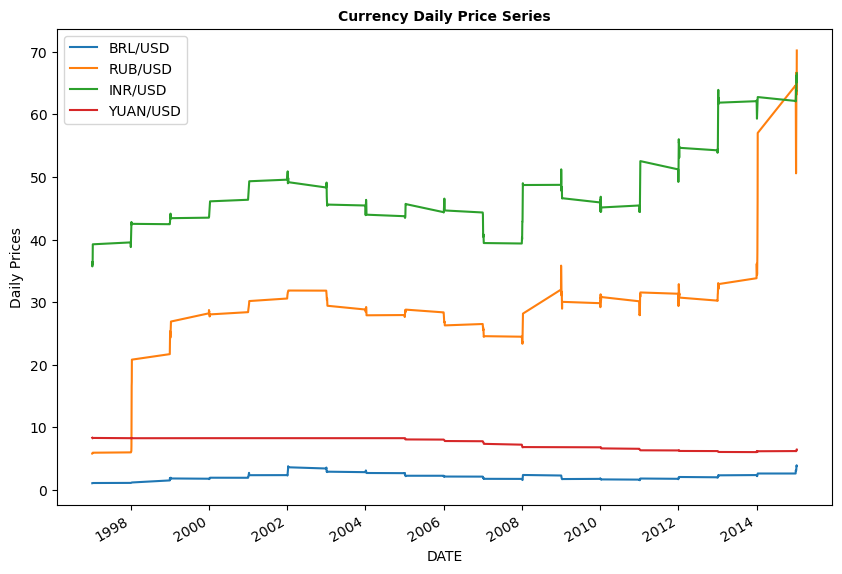

In [ ]:
cy.plot(figsize=(10,7))
plt.ylabel("Daily Prices")
plt.title("Currency Daily Price Series", fontsize= 10, fontweight='bold')
plt.show()

EDA

Palette

In [ ]:
palette = ['#367C6E', '#EECD69', '#F3AC59', '#95AC41', '#E56F3E']

In [ ]:
cy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 222 entries, 1997-01-07 to 2015-01-12
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BRL/USD   222 non-null    float64
 1   RUB/USD   222 non-null    float64
 2   INR/USD   222 non-null    float64
 3   YUAN/USD  222 non-null    float64
dtypes: float64(4)
memory usage: 8.7 KB


Univariate analysis
SwarmPlot

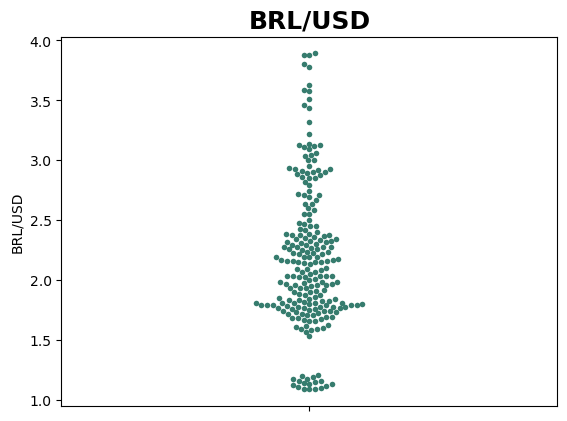

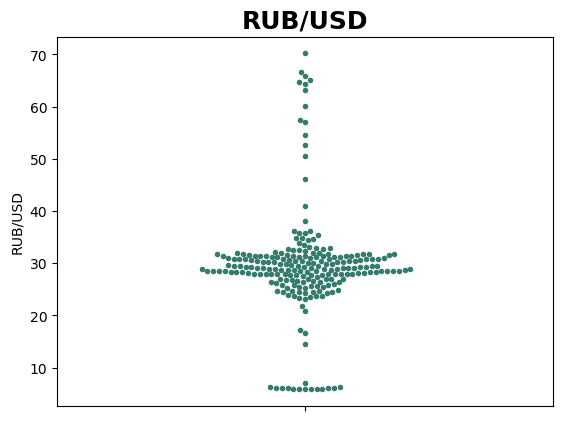

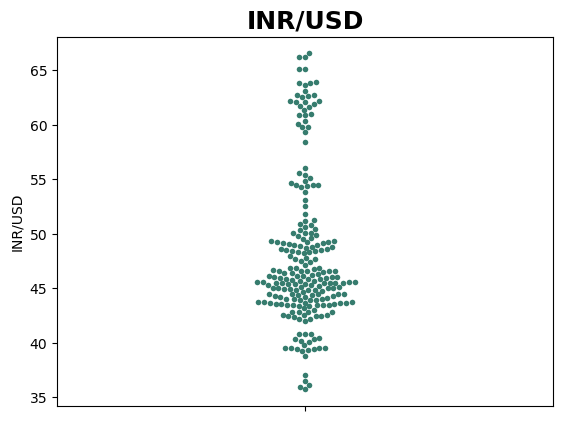

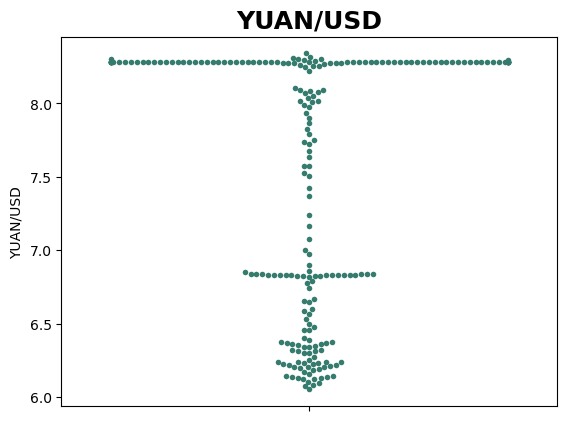

In [ ]:
for feat in cy.columns:
    sns.swarmplot (data=cy, y= feat, s=4, color=palette[0])
    plt.title (feat, fontsize= 18, fontweight= 'bold')
    plt.show()

ViolinPLot

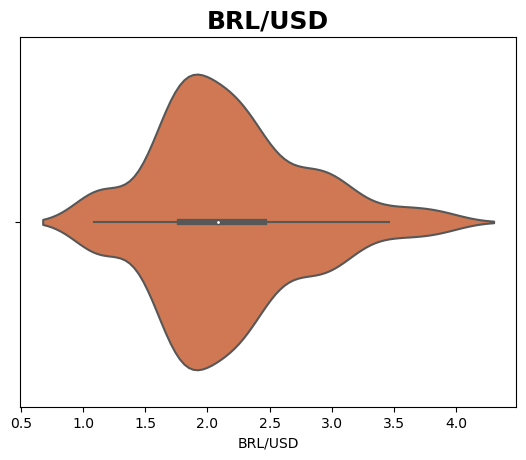

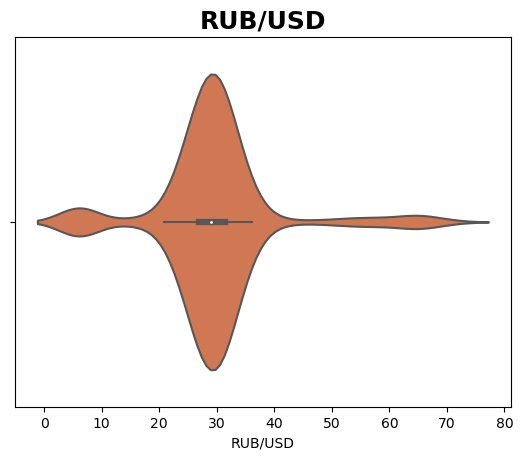

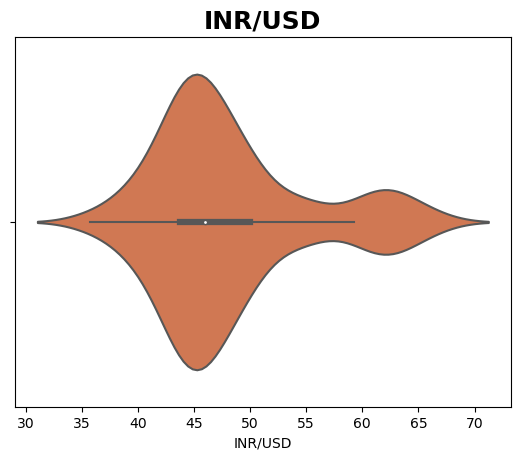

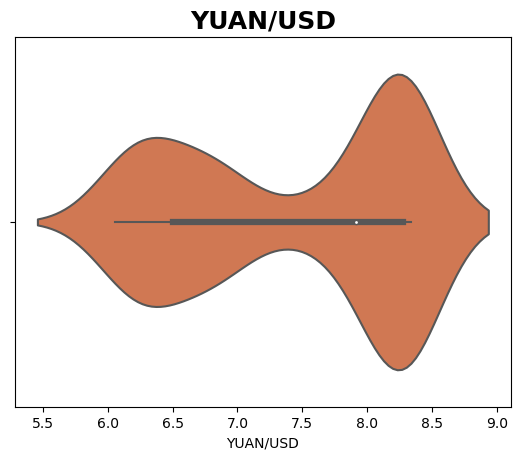

In [ ]:
for feat in cy.columns:
    sns.violinplot ( data=cy , x= feat , showfliers= False, color=palette[4])
    plt.title(feat, fontsize= 18, fontweight='bold')
    plt.show()

Bivariate analysis

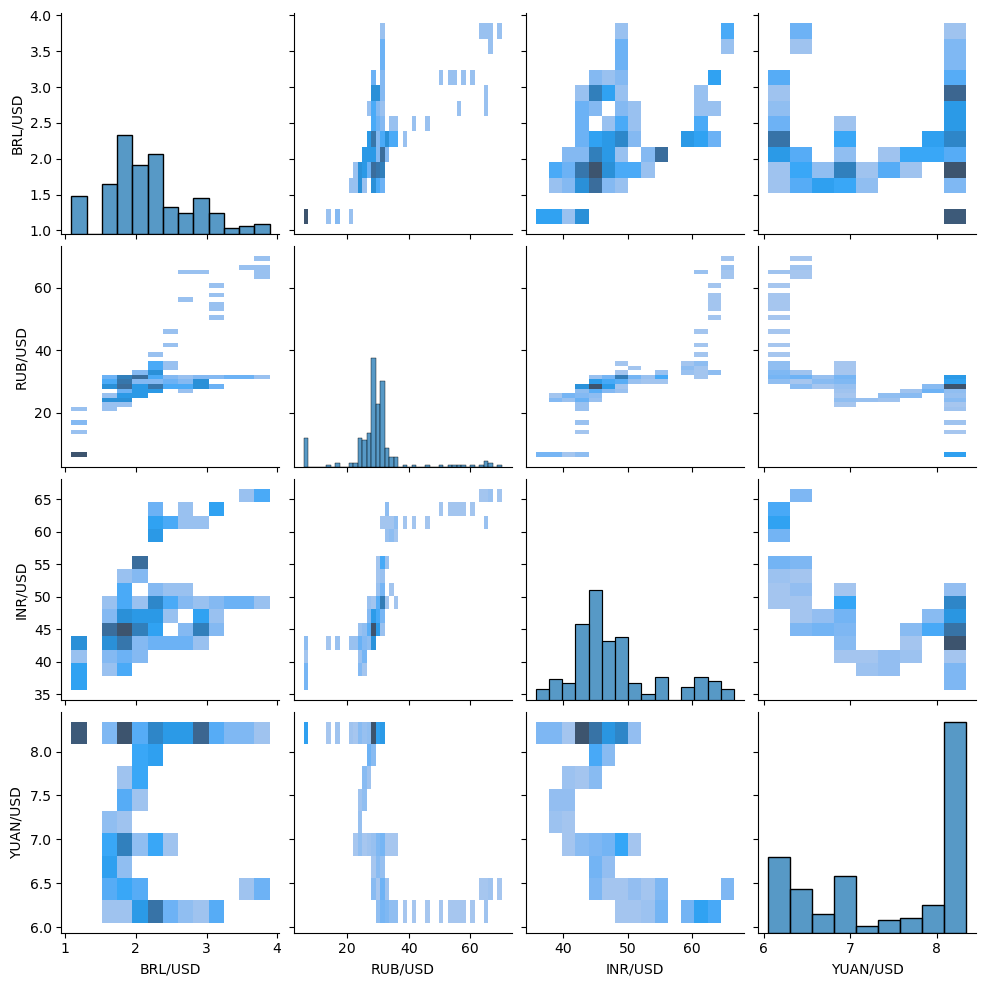

In [ ]:
sns.pairplot (cy.iloc[ : , :], kind='hist')

correlation measure

Text(0.5, 1.0, 'Heatmap of correlation Matrix')

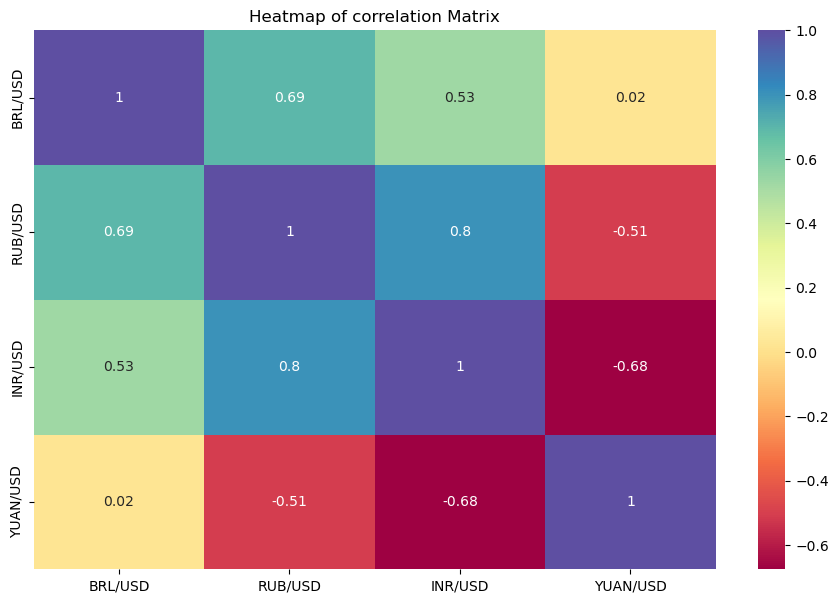

In [ ]:
plt.figure(figsize=(11,7))
sns.heatmap(cy.corr (), annot=True, cmap='Spectral')
plt.title('Heatmap of correlation Matrix')

In [ ]:
cy.columns
cy.index.max()

Timestamp('2015-01-12 00:00:00')

In [ ]:
currency_list = ['YUAN/USD']
# Set the start date and the end date
start_date = '1997-01-07'
end_date = '2015-01-12'

List of predictors

In [ ]:
currency_data_dictionary = {}

for currency_names in currency_list:

# Calculate the daily percent change

 cy['daily_pct_change'] = cy['YUAN/USD'].pct_change()
# create the predictors
predictor_list = []
for r in range(10, 60, 5):
 cy['pct_change_'+str(r)] = cy.daily_pct_change.rolling(r).sum()
 cy['std_'+str(r)] = cy.daily_pct_change.rolling(r).std()
predictor_list.append('pct_change_'+ str(r))
predictor_list.append('std_'+str(r))
# Target Variable
cy['return_next_day'] = cy.daily_pct_change.shift(-1)
cy['actual_signal'] = np.where(cy.return_next_day > 0, 1, -1)
cy = cy.dropna()
currency_data_dictionary.update({currency_names : cy})


Volatility_change

In [ ]:
plt.style.use('bmh')

Text(0.5, 0, '\n Date\n')

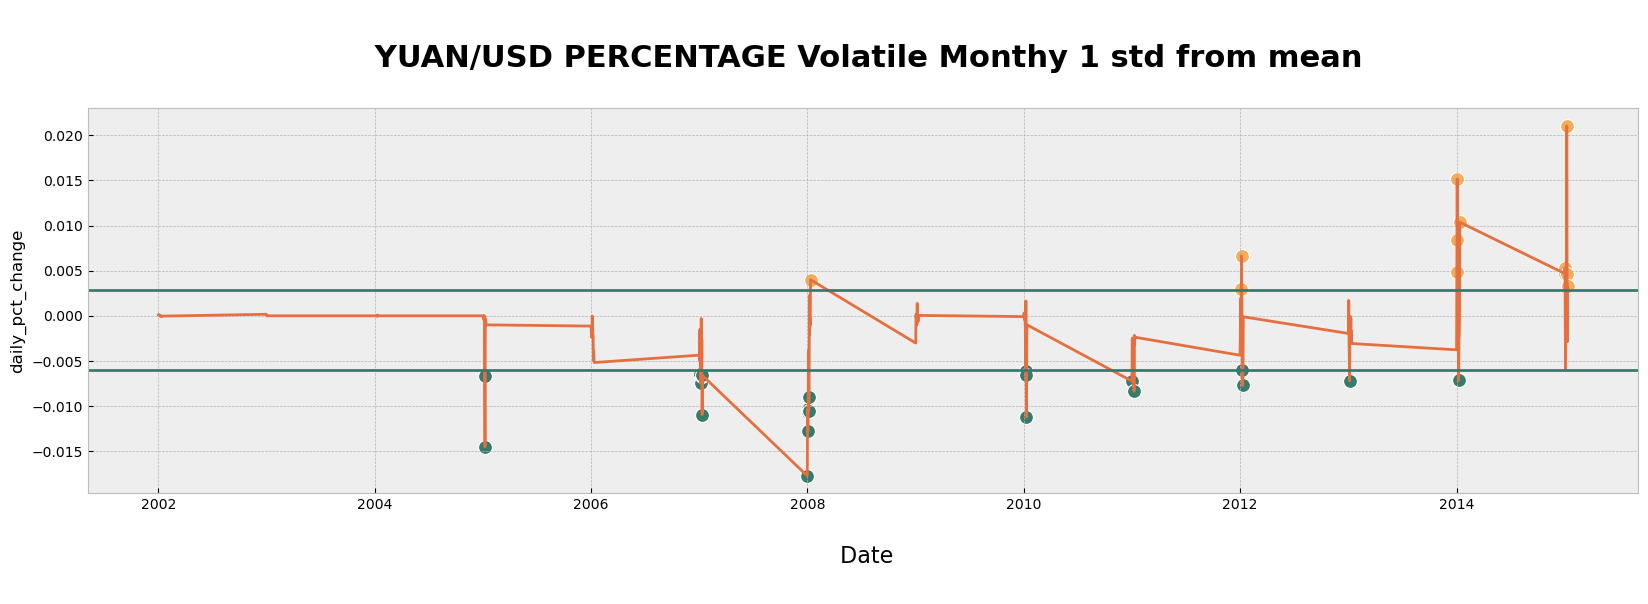

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(20,5))
sns.lineplot(data=cy['daily_pct_change'], ax=ax , color=palette[4], alpha=1)

std = cy['daily_pct_change'].std()
mn = cy['daily_pct_change'].mean()

upper_limit = mn + (1 * std)
lower_limit = mn - (1 * std)

plt.axhline(upper_limit , color= palette[0])
plt.axhline(lower_limit , color= palette[0])

sns.scatterplot(data=cy[(cy['daily_pct_change'] < lower_limit)]['daily_pct_change'],
color=palette[0], ax =ax, s=100)

sns.scatterplot(data=cy[(cy['daily_pct_change'] > upper_limit)]['daily_pct_change'],
color=palette[2], ax =ax, s=100)

plt .title('\n YUAN/USD PERCENTAGE Volatile Monthy 1 std from mean\n ', fontsize=22, fontweight='bold')
plt. xlabel('\n Date\n', fontsize=16)

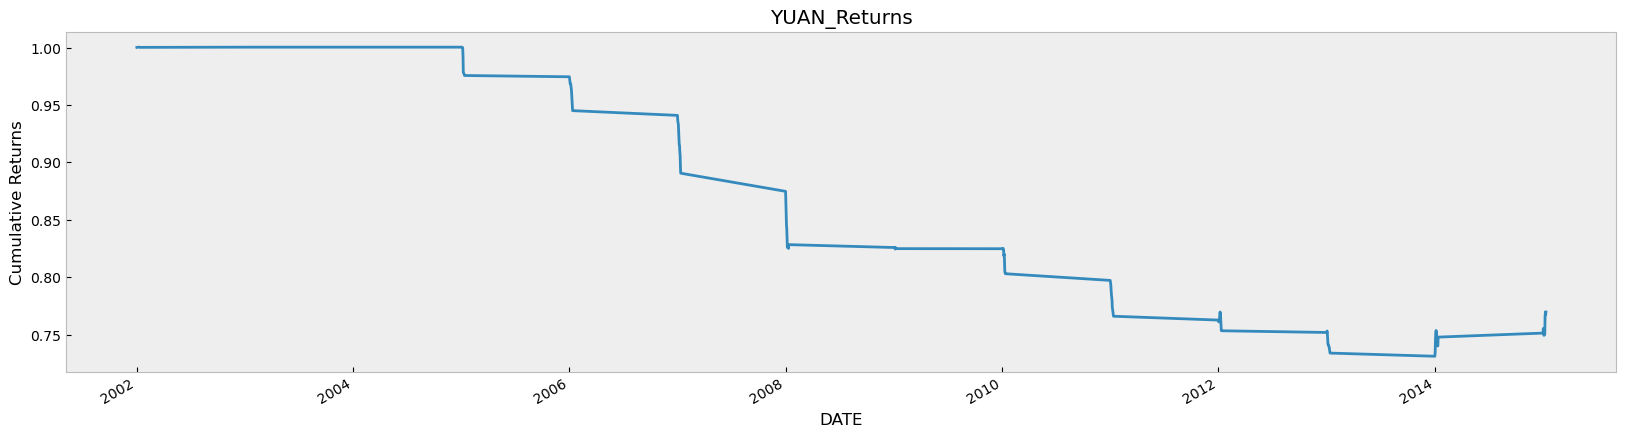

In [ ]:
# Set the figure size
plt.figure(figsize=(20, 5))
# Access the dataframe of AAPL from the dictionary
# and then compute and plot the returns
(currency_data_dictionary['YUAN/USD'].daily_pct_change + 1).cumprod().plot()
# Set the title and axis labels and plot grid
plt.title('YUAN_Returns')
plt.ylabel('Cumulative Returns')
plt.grid()
plt.show()

SPLIT the data into train and test

In [ ]:
X_train = pd.DataFrame()
X_test = pd.DataFrame()
y_train = pd.Series()
y_test = pd.Series()


for currency_names in currency_list:
# Get predictor variables
 X = currency_data_dictionary[currency_names][predictor_list]
# Get the target variable
 y = currency_data_dictionary[currency_names].actual_signal
# Divide the dataset into train and test


train_length = int(len(X)*0.80)
X_train = X_train.append(X[:train_length])
X_test = X_test.append(X[train_length:])
y_train = y_train.append(y[:train_length])
y_test = y_test.append(y[train_length:])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [ ]:
# Intialize the model and the set the hyperparameter


model = XGBClassifier(max_depth=2, n_estimators=500)
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Cross Validation

In [ ]:
# Initialize the KFold parameters
kfold = KFold(n_splits=5 , shuffle=True, random_state=1)
results = cross_val_score( model, X_train, y_train, cv=kfold)
# Print the average results
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 73.45% (6.93%)


Train the model

In [ ]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature importance

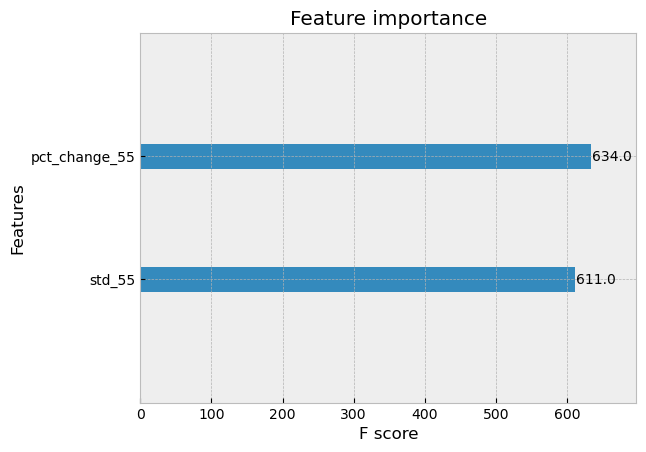

In [ ]:
# plot the top 7 features
xgboost.plot_importance(model, max_num_features=100)
# show the plot
plt.show()

Predict the trading signal on test dataset

In [ ]:
y_pred = model.predict(X_test)
# Get the classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        19
           0       0.00      0.00      0.00         0
           1       0.62      0.67      0.65        15

    accuracy                           0.29        34
   macro avg       0.21      0.22      0.22        34
weighted avg       0.28      0.29      0.28        34



Confusion Matrix

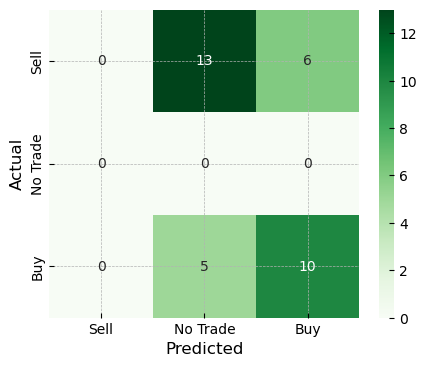

In [ ]:
array = confusion_matrix(y_test, y_pred)
df = pd.DataFrame(array, index=['Sell','No Trade' ,'Buy'], columns=['Sell','No Trade' ,'Buy'])
plt.figure(figsize=(5 ,4))
sns.heatmap(df, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model.predict(X_test)
y_pred = le.inverse_transform(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[13  6]
 [ 5 10]]


0.6764705882352942

['YUAN/USD']


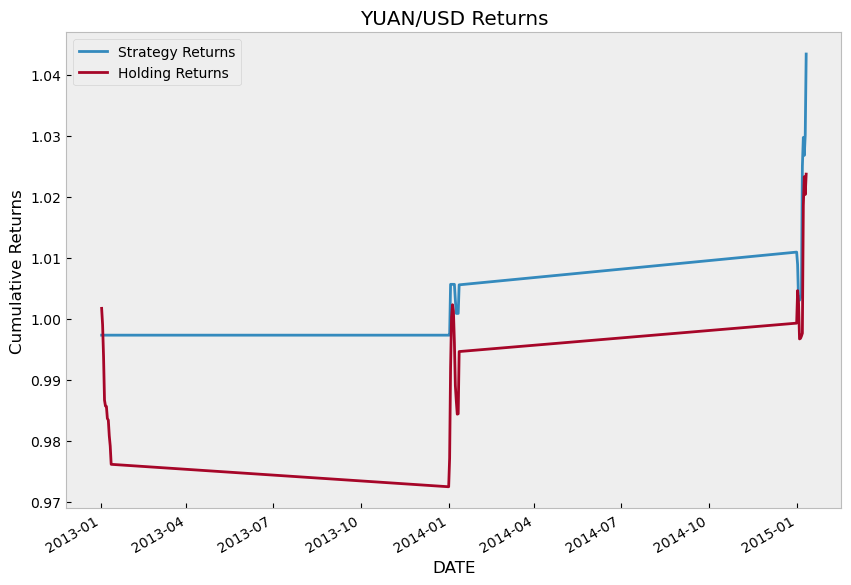

In [ ]:
# Create an empty dataframe to store the strategy returns of individual stocks
portfolio = pd.DataFrame(columns=currency_list)
# For each stock in the stock list, plot the strategy returns and buy and hold returns
for currency_names in currency_list:
# Get the data
 df = currency_data_dictionary[currency_names]
# Store the predictor variables in X
X = df[predictor_list]
# Define the train and test dataset
train_length = int(len(X)*0.80)
# Predict the signal and store in predicted signal column
df['predicted_signal'] = model.predict(X)
# Calculate the strategy returns
df['strategy_returns'] = df.return_next_day * df.predicted_signal
# Add the strategy returns to the portfolio dataframe
portfolio[currency_names] = df.strategy_returns[train_length:]
# Plot the stock strategy and buy and hold returns
print(currency_list)
# Set the figure size
plt.figure(figsize=(10, 7))
# Calculate the cumulative strategy returns and plot
(df.strategy_returns[train_length:]+1).cumprod().plot()
# Calculate the cumulative buy and hold strategy returns
(currency_data_dictionary[currency_names][train_length:].daily_pct_change+1).cumprod().plot()
# Set the title, label and grid
plt.title(currency_names + ' Returns')
plt.ylabel('Cumulative Returns')
plt.legend(labels=['Strategy Returns', 'Holding Returns'])
plt.grid()
plt.show()

Currency Trade

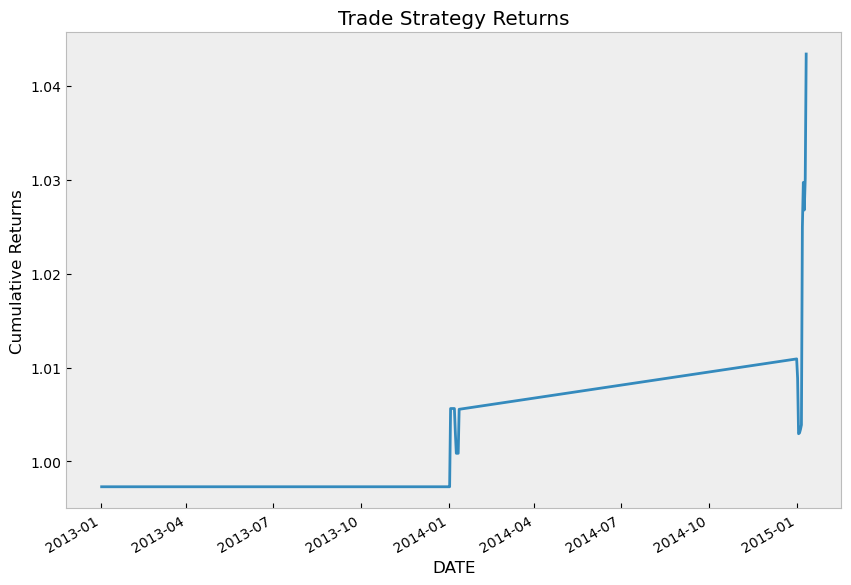

In [ ]:
# Drop missing values
portfolio.dropna(inplace=True)
# Set the figure size
plt.figure(figsize=(10, 7))
# Calculate the cumulative portfolio returns by assuming equal allocation to the stocks
(portfolio.mean(axis=1)+1).cumprod().plot()
# Set the title and label of the chart
plt.title('Trade Strategy Returns')
plt.ylabel('Cumulative Returns')
plt.grid()
plt.show()

In [ ]:
import quantstats as qs

                           Strategy
-------------------------  ----------
Start Period               2013-01-02
End Period                 2015-01-11
Risk-Free Rate             0.0%
Time in Market             48.0%

Cumulative Return          4.34%
CAGR﹪                     2.12%

Sharpe                     4.14
Prob. Sharpe Ratio         98.73%
Smart Sharpe               3.51
Sortino                    14.45
Smart Sortino              12.25
Sortino/√2                 10.22
Smart Sortino/√2           8.66
Omega                      3.36

Max Drawdown               -0.79%
Longest DD Days            358
Volatility (ann.)          7.68%
Calmar                     2.69
Skew                       2.6
Kurtosis                   8.52

Expected Daily %           0.13%
Expected Monthly %         1.43%
Expected Yearly %          1.43%
Kelly Criterion            43.88%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.67%
Expected Shortfall (cVaR)  -0.67%

Max Consecutive Wins       5

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2015-01-02,2015-01-03,2015-01-07,5,-0.788522,-0.780525
2,2014-01-08,2014-01-09,2015-01-01,358,-0.474388,-0.256689
3,2015-01-09,2015-01-09,2015-01-10,1,-0.285782,0.000000


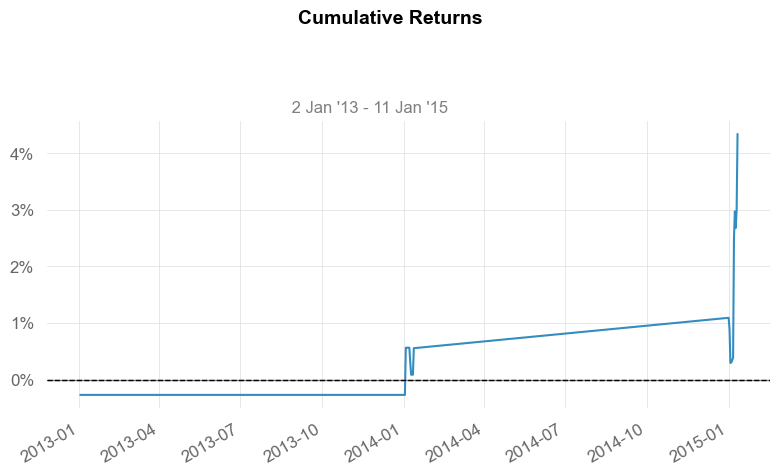

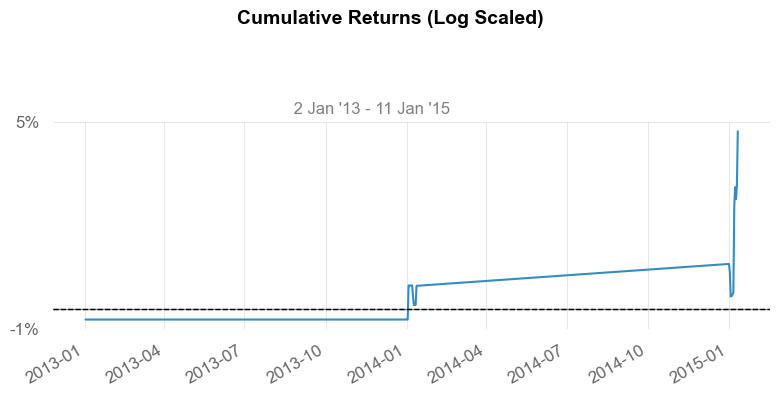

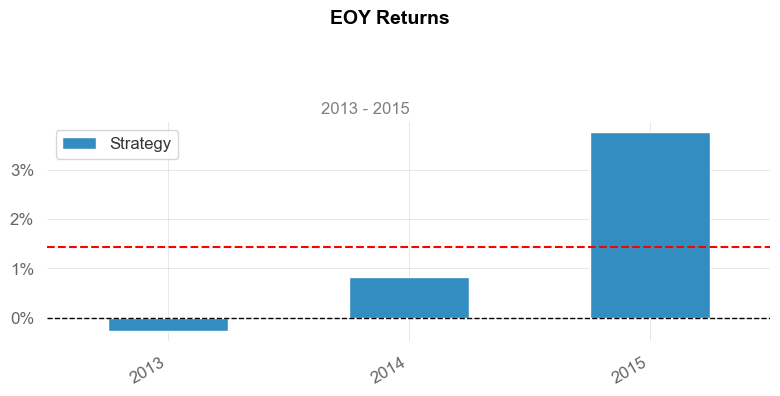

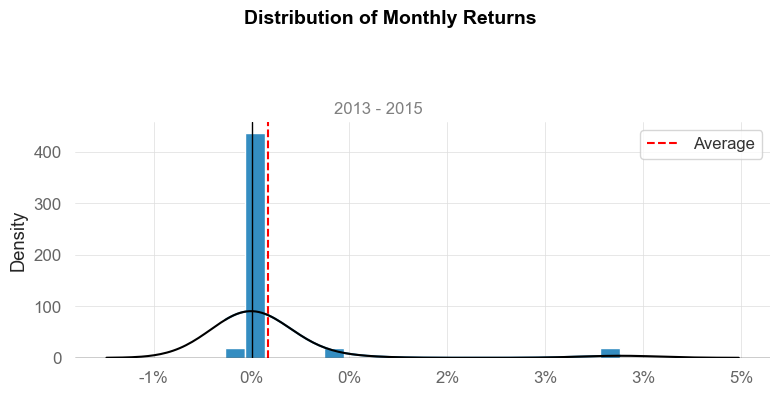

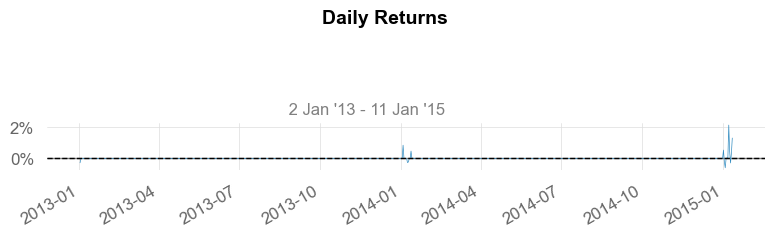

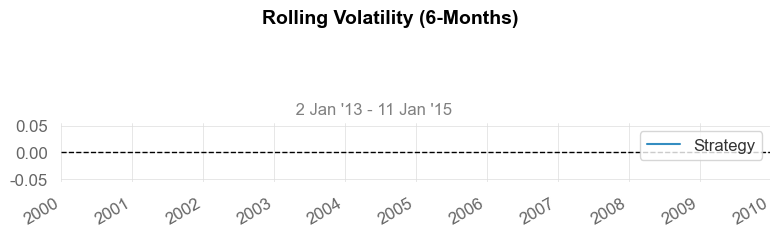

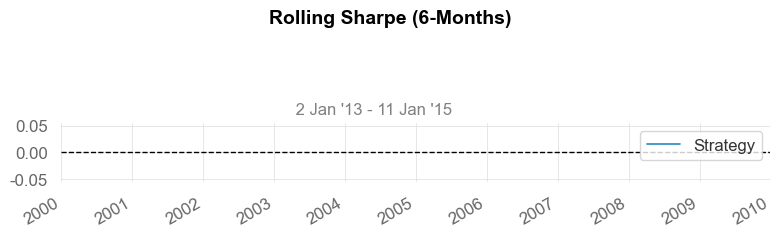

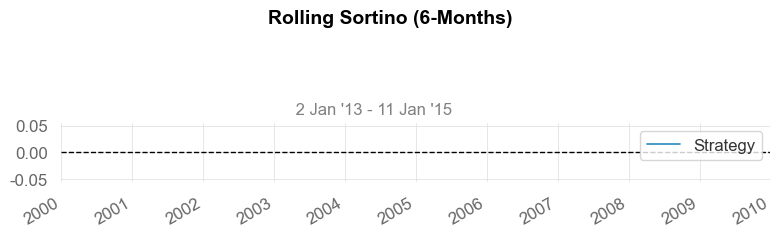

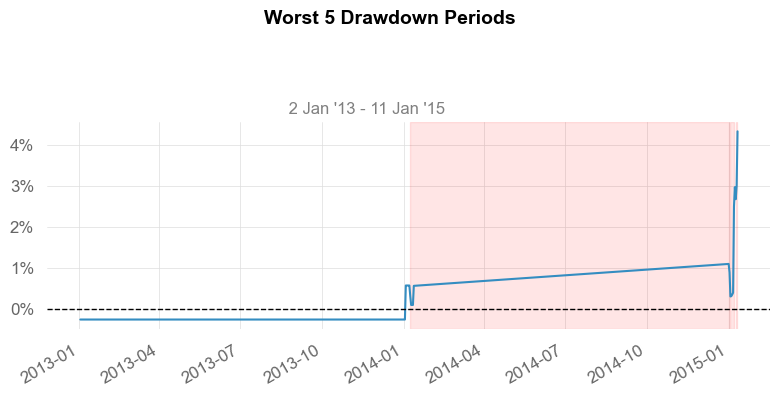

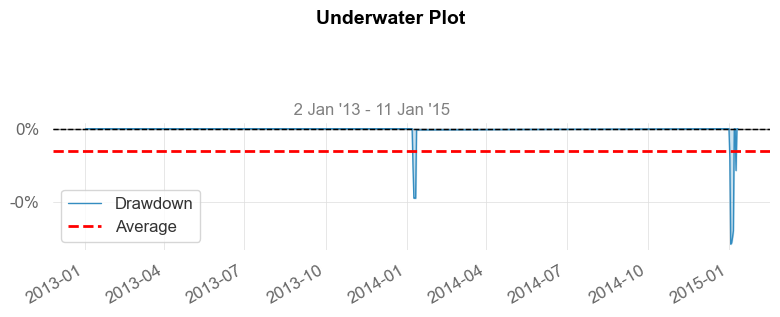

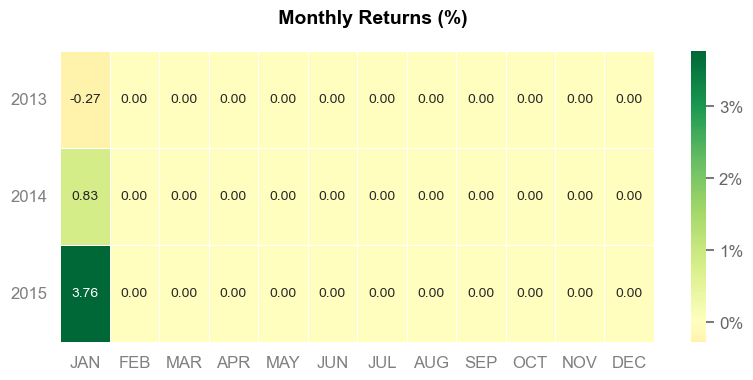

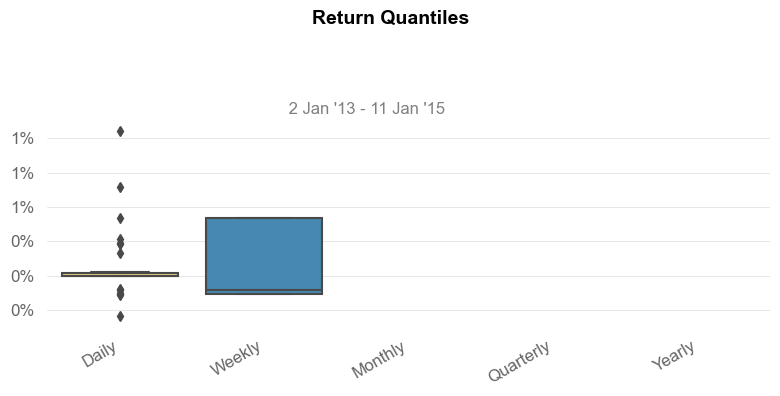

In [ ]:
qs.reports.full(portfolio.mean(axis=1))